<a href="https://colab.research.google.com/github/Ablock0/CS437/blob/master/Copy_of_ML_H6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment #6**

Assigned: April 2, 2020

Due: April 21, 2020



---

This assignment consists of questions that require a short answer and one Python programming task. You can enter your answers and your code directly in a Colaboratory notebook and upload the **shareable** link for your notebook as your homework submission.


---

#1.

 (12 points) Both PCA and linear regression can be thought of as algorithms for minimizing a sum of squared errors. Provide formulas and explain which error is being minimized in each algorithm.


#-> ANSWER 

The formula for PCA will find a set of vectors that will work to minimize the projection error
of each points onto the new set of vectors. This will redcue the dimensionality of the dataset.
<br>
Formula:
1. Shift the dataset to be centered at the origin
2. Find a vector (or set of vectors) that points in the directional of maximum variance / minimum
projection error (they are the same)

Linear Regression aims to find the line will minimize the cost function, which is based upon the
difference between the predicted and actual values of the dataset.
<br>
Formula:
a_0 = a_0 - alpha * (2/n) (summation from i=1 to n of (pred_i - y_i))

---

#2.

(16 points) Consider the robot gridworld Markov Decision Process (MDP) shown below. States are numbered s1 through s6, transitions are indicated by arrows and have probability = 1, immediate rewards are assigned to specific transitions, and transitions with no label have an immediate reward of 0. Assume the discount factor $\gamma = 0.8$ and $\alpha=0.5$.

![](https://drive.google.com/uc?id=1O6hVYZO2SmG7uXb9xPLpyN0RAnylZkaA)

For each state $s$, write the value for $V*(s)$ inside the corresponding square in the diagram. These values should be consistent with the reward values shown in the figures and with the discount factor.

Make the state-action transition arrows that correspond to one optimal policy. If there is a tie, choose the state with the smaller number.

Provide a different value for $\gamma$ which results in a different optimal policy. Describe the resulting policy by indicating which $\pi(s)$ values change (i.e., which policy actions change).

Starting with initial values of 0, simulate two iterations of q-learning starting from state s1 and selecting a sequence of 3 actions per iteration (sequences that force changes to Q values, such as \{right, right, stay\}. Show the updated q(s,a) values after each iteration.


#-> ANSWER

refer to the diagram attached with this github link

---

#3.

(100 points) Use Keras and TensorFlow to design and compare four different convolutional neural networks to recognize MNIST digits. The MNIST dataset is provided as part of Keras. You can design the network structures as you like but each one should differ in both structure (number and ordering of convolution, ReLU, and pooling layers) and parameter values. Provide a brief justification of each network and summarize the performance
of the alternative network structures.

#-> ANSWER
reponses are written after each of the CNN variations below

In [0]:
#installing tensor flow
!pip install tensorflow-gpu==2.0.0-alpha0
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

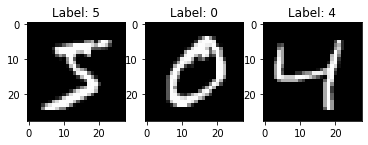

Training Set Data (X):  (60000, 28, 28)
Training Set Labels (Y):  (60000,)
Testing Set Data (X):  (10000, 28, 28)
Testing Set Labels (Y):  (10000,)


In [15]:
#ALL GIVEN CODE FROM IN CLASS PORTION

#imports
from tensorflow.python import keras
import matplotlib
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

device_name = tf.test.gpu_device_name()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

%matplotlib inline
# plot three of the instances
fig, axes = plt.subplots(1,3)
for i in range(3):
    img = x_train[i, :, :]
    axes[i].set_title("Label: %d" % y_train[i])
    axes[i].imshow(img, cmap="gray")
plt.show()

print("Training Set Data (X): ", x_train.shape)
print("Training Set Labels (Y): ", y_train.shape)
print("Testing Set Data (X): ", x_test.shape)
print("Testing Set Labels (Y): ", y_test.shape)

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(
    x=x_train, y=y_train, epochs=5
)

y_pred = model.predict_classes(x=x_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=[
    '%d' % i for i in range(10)
], digits=5))

Epoch 1/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2609 - accuracy: 0.9268
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1158 - accuracy: 0.9657
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0788 - accuracy: 0.9757
Epoch 4/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0587 - accuracy: 0.9825
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0448 - accuracy: 0.9863
Test Accuracy:  0.974
              precision    recall  f1-score   support

           0    0.96813   0.99184   0.97984       980
           1    0.99464   0.98150   0.98803      1135
           2    0.98898   0.95640   0.97241      1032
           3    0.94057   0.98713   0.96329      1010
           4    0.96223   0.98574   0.97384       982
           5    0.99076   0.96188   0.97611       892
           6    0.98211   0.97390   0.97799       958
           7   

This model did better than I thought it would. I did not add any pooling or any convolution to this model and it still came out as my 3rd most accurate model at a 97.4% accuracy

In [19]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(
    x=x_train, y=y_train, epochs=5
)

y_pred = model.predict_classes(x=x_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=[
    '%d' % i for i in range(10)
], digits=5))

Epoch 1/5
60000/60000 [==============================] - 30s 500us/sample - loss: 0.1619 - accuracy: 0.9532
Epoch 2/5
60000/60000 [==============================] - 30s 500us/sample - loss: 0.0581 - accuracy: 0.9822
Epoch 3/5
60000/60000 [==============================] - 30s 497us/sample - loss: 0.0390 - accuracy: 0.9879
Epoch 4/5
60000/60000 [==============================] - 30s 498us/sample - loss: 0.0273 - accuracy: 0.9916
Epoch 5/5
60000/60000 [==============================] - 30s 505us/sample - loss: 0.0196 - accuracy: 0.9934
Test Accuracy:  0.9868
              precision    recall  f1-score   support

           0    0.98584   0.99490   0.99035       980
           1    0.99125   0.99824   0.99473      1135
           2    0.98929   0.98450   0.98689      1032
           3    0.98327   0.98911   0.98618      1010
           4    0.97898   0.99593   0.98738       982
           5    0.98656   0.98767   0.98711       892
           6    0.99261   0.98121   0.98688       958
    

I copied the same model as above but I wanted to see how much more accurate it would become if i only added a single layer of both convolution and pooling. The accuracy did in fact go up by a fairly significant margin, increasing from the previous 97.4% to this model's 98.68% accuracy. The biggest, and most annoying difference that I noticed immediatly was how much more time this model took to compile each epoch compared to the previous one.

In [20]:
model = keras.Sequential([
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(
    x=x_train, y=y_train, epochs=5
)

y_pred = model.predict_classes(x=x_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=[
    '%d' % i for i in range(10)
], digits=5))

Epoch 1/5
60000/60000 [==============================] - 12s 193us/sample - loss: 0.3463 - accuracy: 0.8978
Epoch 2/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.1339 - accuracy: 0.9577
Epoch 3/5
60000/60000 [==============================] - 12s 192us/sample - loss: 0.1098 - accuracy: 0.9653
Epoch 4/5
60000/60000 [==============================] - 11s 191us/sample - loss: 0.0953 - accuracy: 0.9698
Epoch 5/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0849 - accuracy: 0.9728
Test Accuracy:  0.9734
              precision    recall  f1-score   support

           0    0.97009   0.99286   0.98134       980
           1    0.99286   0.98062   0.98670      1135
           2    0.98431   0.97287   0.97856      1032
           3    0.94134   0.98515   0.96275      1010
           4    0.98753   0.96741   0.97737       982
           5    0.99407   0.93946   0.96599       892
           6    0.99051   0.98017   0.98531       958
    

For this model, I wanted to test how each individual aspect affected the accuracy, specifically here I decided to add the pooling layer first, followed by a single convolution layer, then adding 2 more pooling layers after. This was to mainly test the affect of ordering and pooling on the model. The time for each epoch to complete was much better than the last model, but this model started off MUCH less accurate within the first epoch. The model then quickly learned between epochs, but was still my least accurate of the 4 models at only 97.34%. 

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(
    x=x_train, y=y_train, epochs=5
)

y_pred = model.predict_classes(x=x_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=[
    '%d' % i for i in range(10)
], digits=5))

Epoch 1/5
60000/60000 [==============================] - 55s 919us/sample - loss: 0.1444 - accuracy: 0.9546
Epoch 2/5
60000/60000 [==============================] - 54s 901us/sample - loss: 0.0467 - accuracy: 0.9855
Epoch 3/5
60000/60000 [==============================] - 53s 889us/sample - loss: 0.0341 - accuracy: 0.9895
Epoch 4/5
60000/60000 [==============================] - 54s 898us/sample - loss: 0.0252 - accuracy: 0.9919
Epoch 5/5
60000/60000 [==============================] - 55s 910us/sample - loss: 0.0197 - accuracy: 0.9938
Test Accuracy:  0.9888
              precision    recall  f1-score   support

           0    0.98988   0.99796   0.99390       980
           1    0.99383   0.99383   0.99383      1135
           2    0.99803   0.98062   0.98925      1032
           3    0.96824   0.99604   0.98194      1010
           4    0.98788   0.99593   0.99189       982
           5    0.99090   0.97646   0.98363       892
           6    0.99684   0.98852   0.99266       958
    

For my final model, I decided to add multiple layers of convolution and pooling together, as well as adjusting the parameter of the convolution from 32 to 64 to see how accurate i could make the model. This model took an insanely large amount of time to finish each epoch, at almost a full minute per, however it also turned out to be my most accurate model by only .2%! This model finished at an overall 98.88% accuracy.

As a summary, i think it is fairly obvious that the order of the pooling and convolution can have an affect on accuracy in the overall model. Also, it is clear within the final model that adding multiple layers to our CNN will make it more and more accurate, however you will need to keep an eye on the amount of time each epoch will take as you add on more and more layers. A balance for accuracy and resource consumption will need to be found if you are to do larger tests.